<a href="https://colab.research.google.com/github/shyookml/fdl/blob/Chap.4/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Chap. 3**
MNIS data 가지고 놀기



*   Download MNIST data



In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets.mnist import load_data

(x_train_org,y_train_org),(x_test,y_test)=load_data(path='mnist.npz')



*   데이터 형태 확인

  > x_train, x_test: 28x28 image data

  > y_train, y_test: 0~9까지의 label data






(60000, 28, 28) (60000,)
[5 0 4 ... 5 6 8]
(10000, 28, 28) (10000,)
[7 2 1 ... 4 5 6]


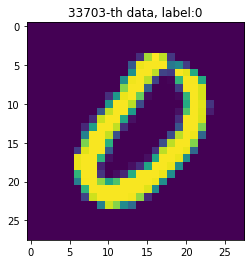

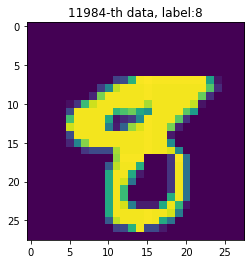

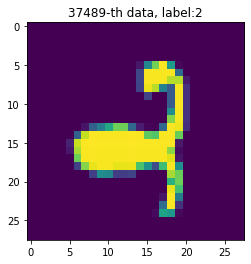

In [ ]:
print(x_train_org.shape,y_train_org.shape)
print(y_train_org)

print(x_test.shape,y_test.shape)
print(y_test)

import matplotlib.pyplot as plt
import numpy as np

sample_size=3
random_idx=np.random.randint(60000,size=sample_size)

for idx in random_idx:
  img=x_train_org[idx,:]
  label=y_train_org[idx]
  #print(img)
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label:%d' %(idx,label))



*   검증 데이터 만들기 -- *데이터 전처리*
> 훈련/테스트 데이터 비: 0.7/0.3

  > 이것은 scikit-learn에서 기능 제공해줌.



In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x_train_org,y_train_org,test_size=0.3,random_state=777)
print(f"훈련데이터 {x_train.shape} 레이블 {y_train.shape}")
print(f"검증데이터 {x_val.shape} 레이블 {y_val.shape}")

훈련데이터 (42000, 28, 28) 레이블 (42000,)
검증데이터 (18000, 28, 28) 레이블 (18000,)


> 1차원 배열로 변환

In [ ]:
num_x_train=x_train.shape[0]
num_x_val=x_val.shape[0]
num_x_test=x_test.shape[0]

x_train=(x_train.reshape((num_x_train,28*28)))/255
x_val=(x_val.reshape((num_x_val,28*28)))/255
x_test=(x_test.reshape((num_x_test,28*28)))/255

print(x_train.shape)


# num_x_train = x_train.shape[0]
# num_x_val = x_val.shape[0]
# num_x_test = x_test.shape[0]

# # 모델의 입력으로 사용하기 위한 전처리 과정입니다.
# x_train = (x_train.reshape((num_x_train, 28 * 28))) / 255
# x_val = (x_val.reshape((num_x_val, 28 * 28))) / 255
# x_test = (x_test.reshape((num_x_test, 28 * 28))) / 255

# print(x_train.shape) # 모델 입력을 위해 데이터를 784차원으로 변경합니다.

(42000, 784)


> label을 범주형 label로 변환

In [ ]:
from tensorflow.keras.utils import to_categorical

# 주의: 변수 이름 바꿨음!!!
y_train_categ=to_categorical(y_train)
y_val_categ=to_categorical(y_val)
y_test_categ=to_categorical(y_test)

print(y_train_categ)

[2 7 6 ... 3 4 5]




*   모델구성

> 3개 층으로 구성된 DNN



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()

model.add(Dense(64,activation='relu', input_shape=(784,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

*   모델 연결하기 (묶기)
> loss function: categorical_crossentropy

  > optimzer: Adam

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])



*   모델 학습하기



In [ ]:
history=model.fit(x_train,y_train_categ,epochs=30,batch_size=128,validation_data=(x_val,y_val_categ))

Epoch 1/30
329/329 [==============================] - 5s 10ms/step - loss: 0.5180 - acc: 0.8527 - val_loss: 0.2579 - val_acc: 0.9257
Epoch 2/30
329/329 [==============================] - 3s 9ms/step - loss: 0.2147 - acc: 0.9384 - val_loss: 0.1942 - val_acc: 0.9438
Epoch 3/30
329/329 [==============================] - 2s 7ms/step - loss: 0.1623 - acc: 0.9528 - val_loss: 0.1667 - val_acc: 0.9517
Epoch 4/30
329/329 [==============================] - 3s 8ms/step - loss: 0.1313 - acc: 0.9620 - val_loss: 0.1515 - val_acc: 0.9567
Epoch 5/30
329/329 [==============================] - 2s 7ms/step - loss: 0.1113 - acc: 0.9677 - val_loss: 0.1365 - val_acc: 0.9601
Epoch 6/30
329/329 [==============================] - 3s 8ms/step - loss: 0.0937 - acc: 0.9725 - val_loss: 0.1213 - val_acc: 0.9631
Epoch 7/30
329/329 [==============================] - 2s 6ms/step - loss: 0.0812 - acc: 0.9762 - val_loss: 0.1155 - val_acc: 0.9661
Epoch 8/30
329/329 [==============================] - 1s 4ms/step - loss: 0



*   모델 평가



In [ ]:
model.evaluate(x_test,y_test_categ)

313/313 [==============================] - 0s 1ms/step - loss: 0.1269 - acc: 0.9743


[0.12691794335842133, 0.9743000268936157]

* 학습 결과 그려보기

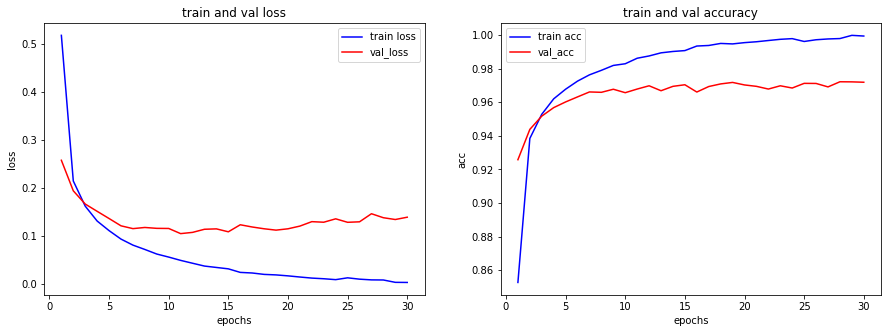

In [ ]:
import matplotlib.pyplot as plt

his_dict=history.history
loss=his_dict['loss']
val_loss=his_dict['val_loss']

epochs=range(1,len(loss)+1)
fig=plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,2,1)
ax1.plot(epochs,loss,color='b',label='train loss')
ax1.plot(epochs,val_loss,color='r',label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()


acc=his_dict['acc']
val_acc=his_dict['val_acc']
ax2=fig.add_subplot(1,2,2)
ax2.plot(epochs,acc,color='b',label='train acc')
ax2.plot(epochs,val_acc,color='r',label='val_acc')
ax2.set_title('train and val accuracy')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()
plt.show()

* 학습된 모델을 통해 값 예측하기

In [ ]:
import numpy as np

results=model.predict(x_test)
print(results.shape)
np.set_printoptions(precision=7)
print(f'각 클래스에 속할 확률\n{results[0]}')
print(f"estimation:{np.argmax(results[0])}")
print(f"정답:{y_test[0]}")


(10000, 10)
각 클래스에 속할 확률
[1.2983900e-09 2.3188597e-12 2.5574814e-10 3.6832702e-07 3.5250479e-14
 4.4567818e-11 1.1808038e-18 9.9999821e-01 1.3777893e-06 7.0675021e-08]
estimation:7
정답:7
